In [1]:
import numpy as np

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [58]:
import pandas as pd
df = pd.read_csv('pageblock.csv')
df = df.sort_values(by='class')
df=df.reset_index(drop=True)
df.head(370)

,height,length,area,eccentricity,p_black,p_and,mean_tr,blackpix,blackand,web_trans,class
0,163,161,26243,0.988,0.523,0.897,8.40,13725,23547,1634,graphic
1,174,471,81954,2.707,0.339,0.433,15.84,27820,35499,1756,graphic
2,72,96,6912,1.333,0.488,0.582,15.69,3374,4025,215,graphic
3,128,347,44416,2.711,0.399,0.567,13.07,17721,25163,1356,graphic
4,186,469,87234,2.522,0.378,0.529,22.29,33017,46133,1481,graphic
5,187,141,26367,0.754,0.415,0.884,4.69,10947,23301,2333,graphic
6,64,73,4672,1.141,0.403,0.445,72.38,1882,2077,26,graphic
7,63,66,4158,1.048,0.491,0.591,44.37,2041,2458,46,graphic
8,65,50,3250,0.769,0.454,0.487,245.83,1475,1582,6,graphic
9,63,79,4977,1.254,0.338,0.345,186.78,1681,1718,9,graphic


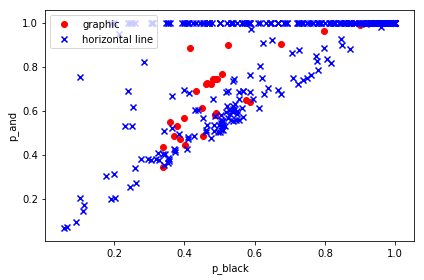

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select graphic and rest
y = df.iloc[0:356, 10].values
y = np.where(y == 'graphic', -1, 1)

# extract blackand and area
X = df.iloc[0:356, [4,5]].values

# plot data
plt.scatter(X[:27, 0], X[:27, 1],
            color='red', marker='o', label='graphic')
plt.scatter(X[28:356, 0], X[28:356, 1],
            color='blue', marker='x', label='horizontal line')

plt.xlabel('p_black')
plt.ylabel('p_and')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./iris_1.png', dpi=300)
plt.show()


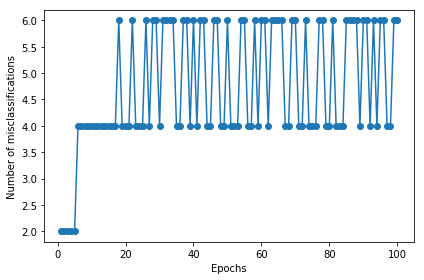

In [63]:
ppn = Perceptron(eta=.001, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')

plt.tight_layout()
# plt.savefig('./perceptron_1.png', dpi=300)
plt.show()

In [64]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

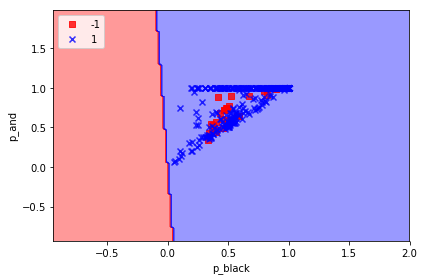

In [66]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('p_black')
plt.ylabel('p_and')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()